# Notebook to generate charts for the smaller date intervals used in the report.

In [1]:
# import packages
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import datetime as dt
import random as random
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import os
# get current working directory to load and save files
thedir = os.getcwd()
# use cwd to to get folders containing figures and data
datadir = os.path.abspath(os.path.join(os.path.dirname(thedir), '..', 'acrop/model_results'))
figdir = os.path.abspath(os.path.join(os.path.dirname(thedir), '..', 'acrop/figures'))

from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [2]:
# collect the data for graphing by season, aggregating by depth and interval
depths = [5,10,15,20,25]
dates= ["30_60","30_80","30_110","60_110","60_130","80_110","80_140","110_140"]
# load files
dates_s = []
for i in depths:
    for j in dates:
        df = pd.read_csv(F'{datadir}/{j}_{i}s.csv')
        df["depth"] = i
        df["interval"] = j
        dates_s.append(df)
# concatonate the three loaded results into one df.
for i in range(len(dates_s)):
    if i == 0:
        merged_s = pd.DataFrame()
    merged_s = pd.concat([merged_s,dates_s[i]],axis=0)
merged_s.reset_index(inplace=True,drop=True)

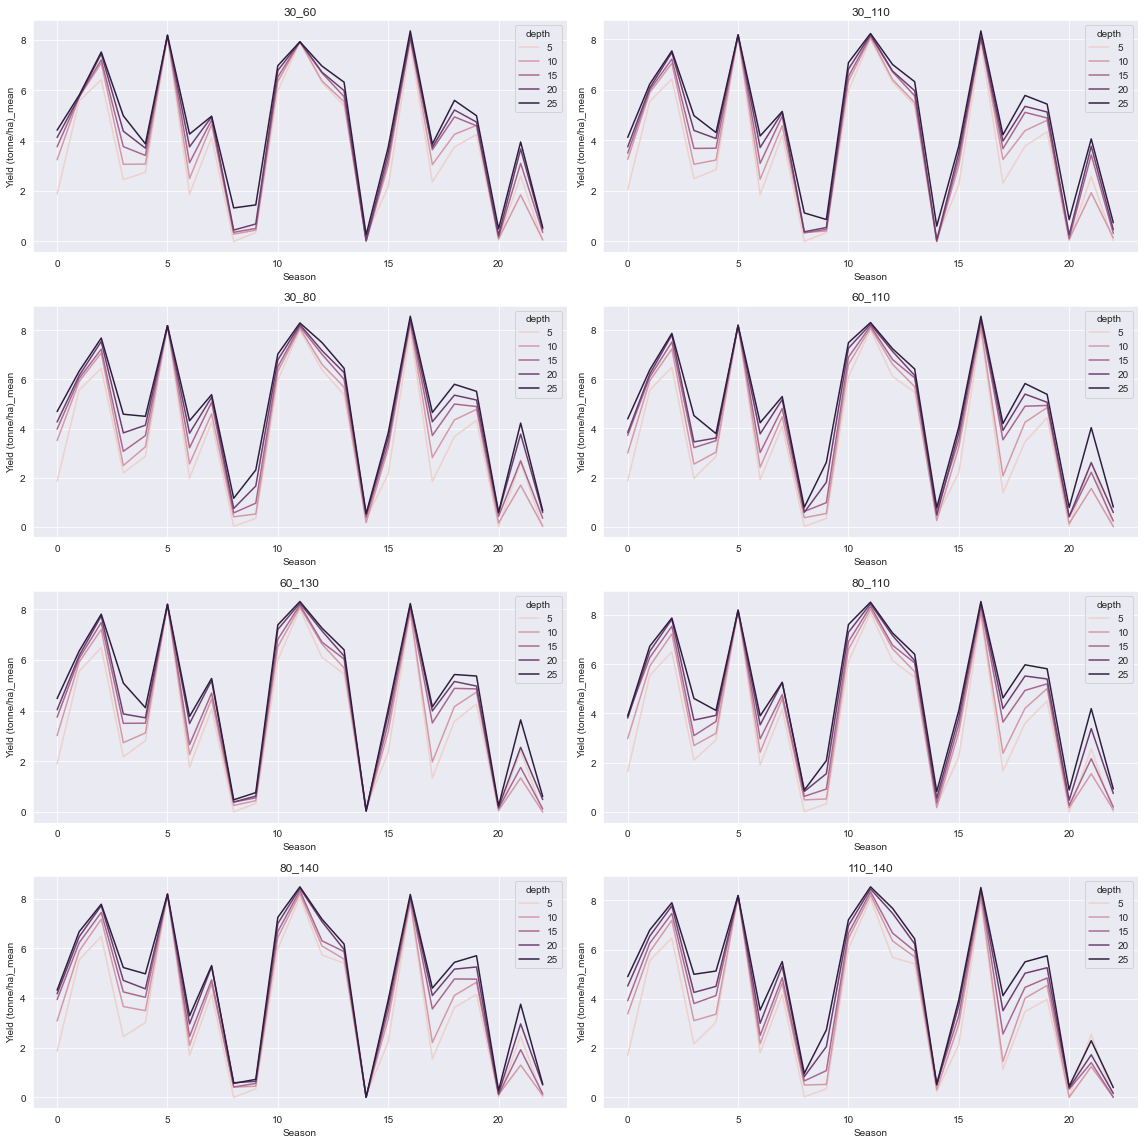

In [3]:
# plot the seasonal data

sns.set_style('darkgrid')
fig, axs = plt.subplots(4,2,figsize=(16,16))
data_= merged_s[merged_s.interval == '30_60']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax=axs[0,0])
axs[0,0].set_title('30_60')
data_= merged_s[merged_s.interval == '30_80']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax=axs[0,1])
axs[1,0].set_title('30_80')
data_= merged_s[merged_s.interval == '30_110']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax=axs[1,0])
axs[0,1].set_title('30_110')
data_= merged_s[merged_s.interval == '60_110']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax = axs[1,1])
axs[1,1].set_title('60_110')
data_= merged_s[merged_s.interval == '60_130']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax=axs[2,0])
axs[2,0].set_title('60_130')
data_= merged_s[merged_s.interval == '80_110']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax=axs[2,1])
axs[2,1].set_title('80_110')
data_= merged_s[merged_s.interval == '80_140']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax=axs[3,0])
axs[3,0].set_title('80_140')
data_= merged_s[merged_s.interval == '110_140']
sns.lineplot(data=data_, x='Season',y='Yield (tonne/ha)_mean',hue = 'depth',ax = axs[3,1])
axs[3,1].set_title('110_140')
plt.tight_layout()
plt.savefig(F"{figdir}/season_")

In [4]:
# get the files on the data aggregated by runs for the main analysis.

depths = [5,10,15,20,25]
dates= ["30_60","30_80","30_110","60_110","60_130","80_110","80_140","110_140"]
# load files
dates_ = []
for i in depths:
    for j in dates:
        df = pd.read_csv(F'{datadir}/{j}_{i}.csv')
        df["depth"] = i
        df["interval"] = j
        dates_.append(df)
# concatonate the three loaded results into one df.
for i in range(len(dates_)):
    if i == 0:
        merged = pd.DataFrame()
    merged = pd.concat([merged,dates_[i]],axis=0)

In [5]:
# get the top n yields and display it
top = merged.nlargest(15,["Yield (tonne/ha)_mean"])
top.reset_index(inplace=True,drop=True)
top = top[["Yield (tonne/ha)_mean",'irrigation_1',
       'irrigation_2', 'depth','interval']]
top

,Yield (tonne/ha)_mean,irrigation_1,irrigation_2,depth,interval
0,5.117229,36,103,25,30_110
1,5.072303,24,106,25,30_110
2,5.067756,52,103,25,60_110
3,5.057621,53,103,25,60_110
4,5.044734,84,104,25,80_110
5,5.043243,88,103,25,80_110
6,5.037315,32,106,25,30_110
7,5.029205,84,105,25,80_110
8,5.028352,84,103,25,80_110
9,5.027057,106,139,25,110_140


In [6]:
# obtain the mean of each of the variables in the graphs to draw the line plots

data_ = merged
group_mean = data_.groupby(["interval","depth"]).agg({'Yield (tonne/ha)_mean' : 'mean', 
                            'biomass_mean' : 'mean',
                            'harvest_index_mean' : 'mean',
                            'canopy_cover_mean': 'mean',
                            'Es_mean' : 'mean',
                            'Tr_mean': 'mean',
                            'DeepPerc_mean': 'mean',
                            'CR_mean': 'mean'})
#group_mean.columns = ["_".join(pair) for pair in group_mean.columns]
group_mean.reset_index(drop = False,inplace = True)

group_max = data_.groupby(["interval","depth"]).agg({'Yield (tonne/ha)_max' : 'mean', 
                            'biomass_max' : 'mean',
                            'harvest_index_max' : 'mean',
                            'canopy_cover_max': 'mean',
                            'Es_max' : 'mean',
                            'Tr_max': 'mean',
                            'DeepPerc_max': 'mean',
                            'CR_max': 'mean'})
group_max.reset_index(drop = False,inplace = True)
group_min = data_.groupby(["interval","depth"]).agg({'Yield (tonne/ha)_min' : 'mean', 
                            'biomass_min' : 'mean',
                            'harvest_index_min' : 'mean',
                            'canopy_cover_min': 'mean',
                            'Es_min' : 'mean',
                            'Tr_min': 'mean',
                            'DeepPerc_min': 'mean',
                            'CR_min': 'mean'})
group_min.reset_index(drop = False,inplace = True)
group_var = data_.groupby(["interval","depth"]).agg({'Yield (tonne/ha)_var' : 'mean', 
                            'biomass_var' : 'mean',
                            'harvest_index_var' : 'mean',
                            'canopy_cover_var': 'mean',
                            'Es_var' : 'mean',
                            'Tr_var': 'mean',
                            'DeepPerc_var': 'mean',
                            'CR_var': 'mean'})
group_var.reset_index(drop = False,inplace = True)

In [32]:
# construct naive t statistic using Welch's method for each interval versus the baseline.
baseline= pd.read_csv(F"{datadir}/all_results_baseline.csv")
td_10 = baseline[baseline.depth==10].copy()
td_10["baseline_10"] = "baseline_10"
td_25 = baseline[baseline.depth==25].copy()
td_25["baseline_25"] = "baseline_25"
td10 = td_10[["baseline_10","Yield (tonne/ha)_mean"]]
td25 = td_25[["baseline_25","Yield (tonne/ha)_mean"]]

mylist = []
for i in [10,25]:
    for j in dates:
        a= merged[merged.depth==i]
        c = a[a.interval==j]
        d = c[["depth","interval","Yield (tonne/ha)_mean"]]
        if i == 10:
            b = ttest_ind(d['Yield (tonne/ha)_mean'], td10['Yield (tonne/ha)_mean'],equal_var=False)
            c = b.statistic
            d = b.pvalue
            mylist.append([c,d,F'{j}-{i}'])
        elif i == 25:
            b = ttest_ind(d['Yield (tonne/ha)_mean'], td25['Yield (tonne/ha)_mean'],equal_var=False)
            c = b.statistic
            d = b.pvalue
            mylist.append([c,d,F'{j}-{i}'])

            results = pd.DataFrame(mylist)
test_results = results.rename(columns={results.columns[0]: 'Test Statistic',results.columns[1]: 'P_Value',results.columns[2]:'interval - depth'})
test_results

,Test Statistic,P_Value,interval - depth
0,-0.149259,8.815961e-01,30_60-10
1,8.624791,5.117457e-14,30_80-10
2,4.960646,2.374248e-05,30_110-10
3,-0.757862,4.543729e-01,60_110-10
4,-12.059138,1.181991e-21,60_130-10
5,4.124258,2.448993e-04,80_110-10
6,-3.744336,4.729414e-04,80_140-10
7,-3.562057,1.281350e-03,110_140-10
8,-14.484999,3.419262e-33,30_60-25
9,-3.730808,3.522649e-04,30_80-25


In [33]:
mylist = []
for i in test_results.P_Value:
    if i < .05:
        mylist.append("significant")
    else:
        mylist.append("not significant")
test_results["significance"] = mylist

In [34]:
test_results

,Test Statistic,P_Value,interval - depth,significance
0,-0.149259,8.815961e-01,30_60-10,not significant
1,8.624791,5.117457e-14,30_80-10,significant
2,4.960646,2.374248e-05,30_110-10,significant
3,-0.757862,4.543729e-01,60_110-10,not significant
4,-12.059138,1.181991e-21,60_130-10,significant
5,4.124258,2.448993e-04,80_110-10,significant
6,-3.744336,4.729414e-04,80_140-10,significant
7,-3.562057,1.281350e-03,110_140-10,significant
8,-14.484999,3.419262e-33,30_60-25,significant
9,-3.730808,3.522649e-04,30_80-25,significant


In [28]:
test_results.at[0,"Test Statistic, P-Value"].pvalue

0.8815961150926865

The rest of this code is generating the same charts over and over for each variable in question.

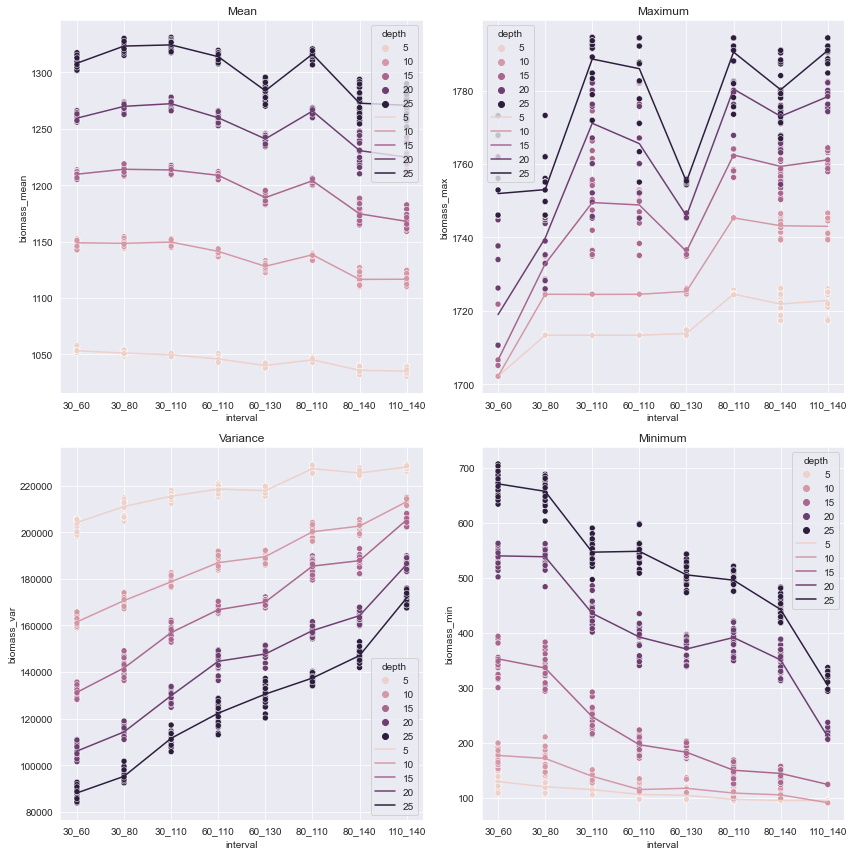

In [9]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['biomass_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='biomass_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='biomass_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['biomass_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='biomass_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='biomass_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['biomass_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='biomass_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='biomass_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['biomass_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='biomass_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='biomass_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/biomass_int")

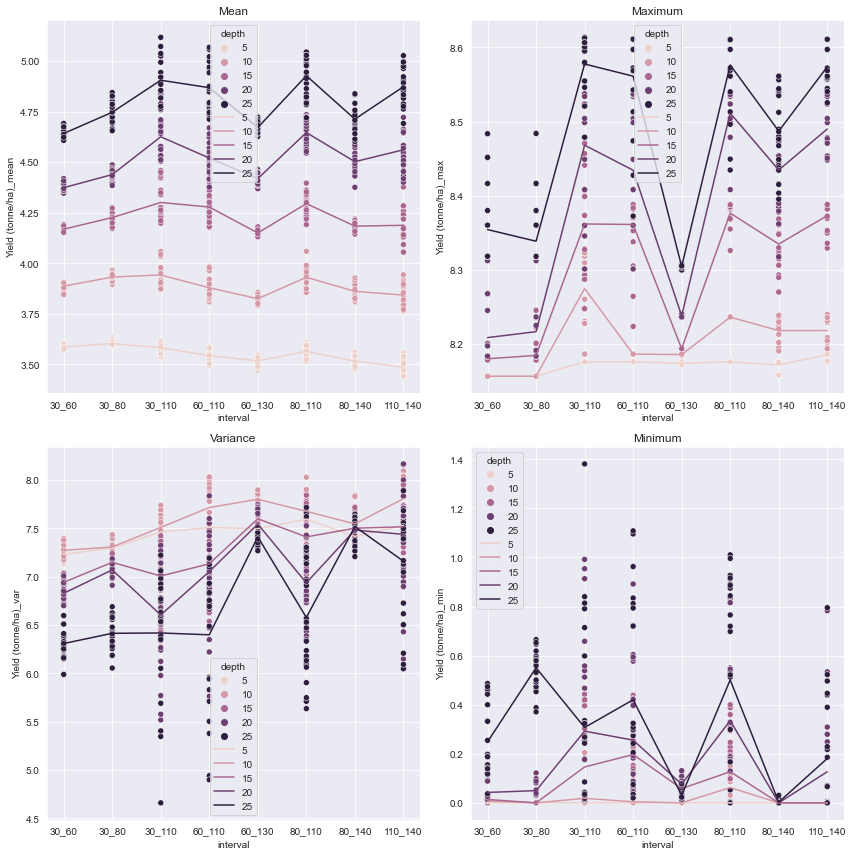

In [10]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Yield (tonne/ha)_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Yield (tonne/ha)_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='Yield (tonne/ha)_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['Yield (tonne/ha)_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Yield (tonne/ha)_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='Yield (tonne/ha)_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['Yield (tonne/ha)_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Yield (tonne/ha)_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='Yield (tonne/ha)_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['Yield (tonne/ha)_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Yield (tonne/ha)_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='Yield (tonne/ha)_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/yield_int")

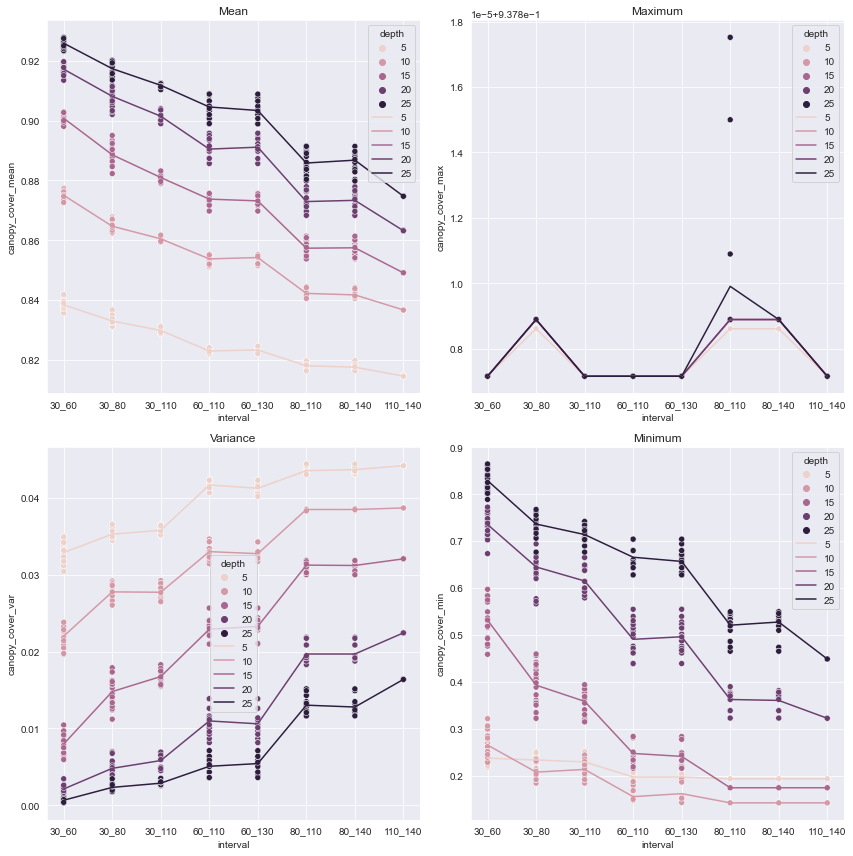

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['canopy_cover_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='canopy_cover_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='canopy_cover_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['canopy_cover_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='canopy_cover_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='canopy_cover_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['canopy_cover_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='canopy_cover_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='canopy_cover_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['canopy_cover_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='canopy_cover_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='canopy_cover_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/canopy_cover_int")

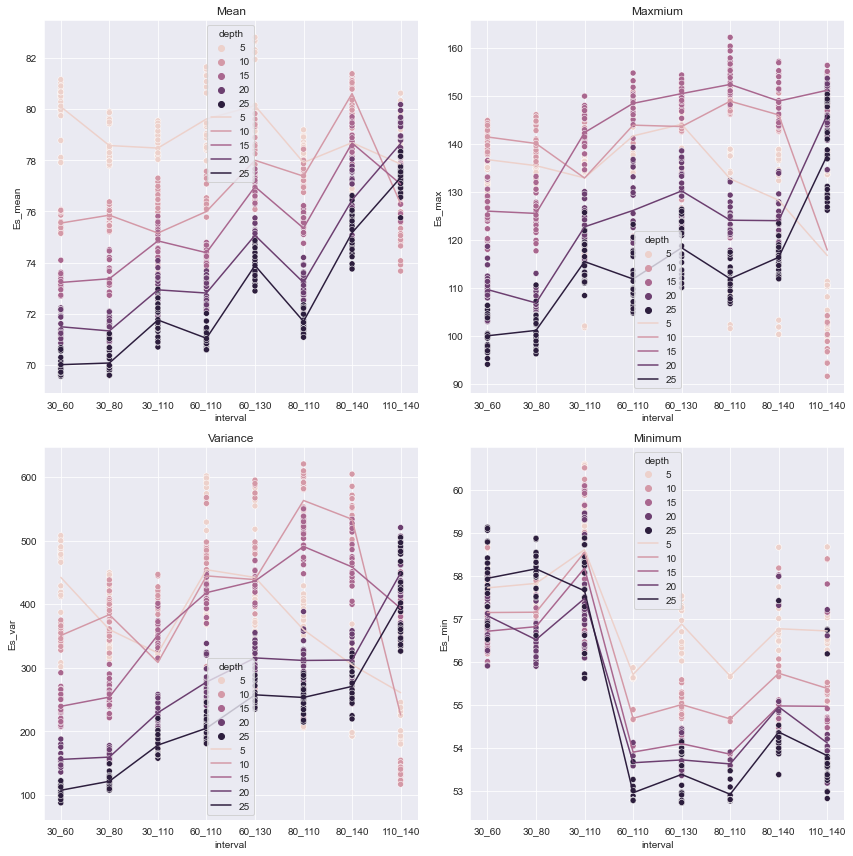

In [12]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Es_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Es_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='Es_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['Es_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Es_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='Es_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maxmium')
data = data_[['Es_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Es_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='Es_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['Es_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Es_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='Es_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/Es_int")

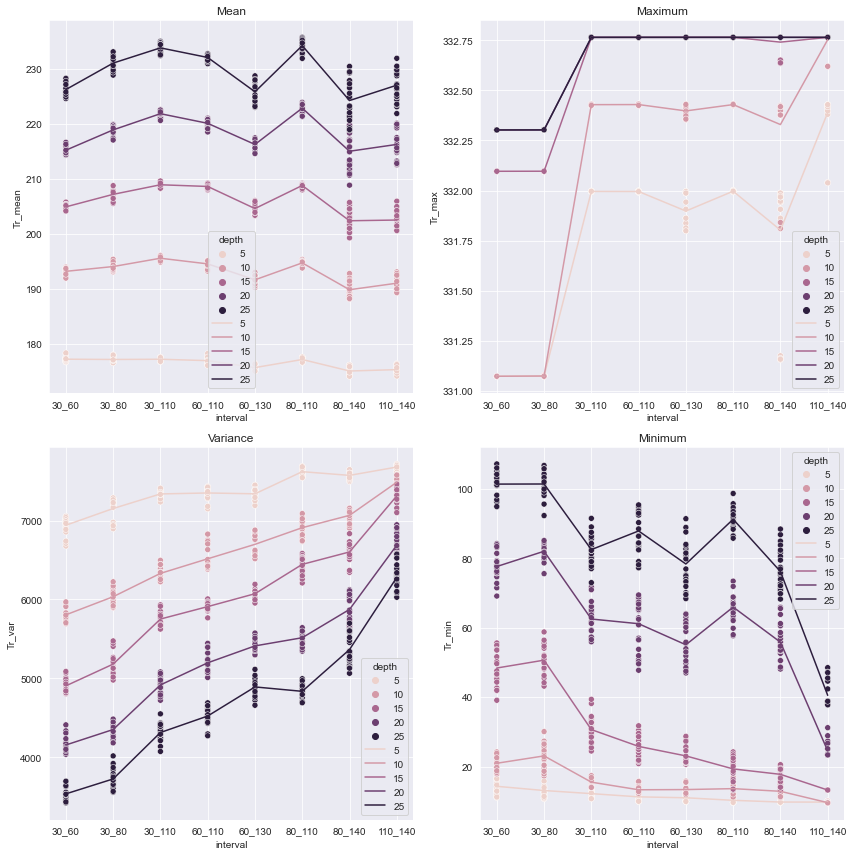

In [13]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Tr_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Tr_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='Tr_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['Tr_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Tr_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='Tr_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['Tr_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Tr_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='Tr_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['Tr_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='Tr_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='Tr_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/Tr_int")

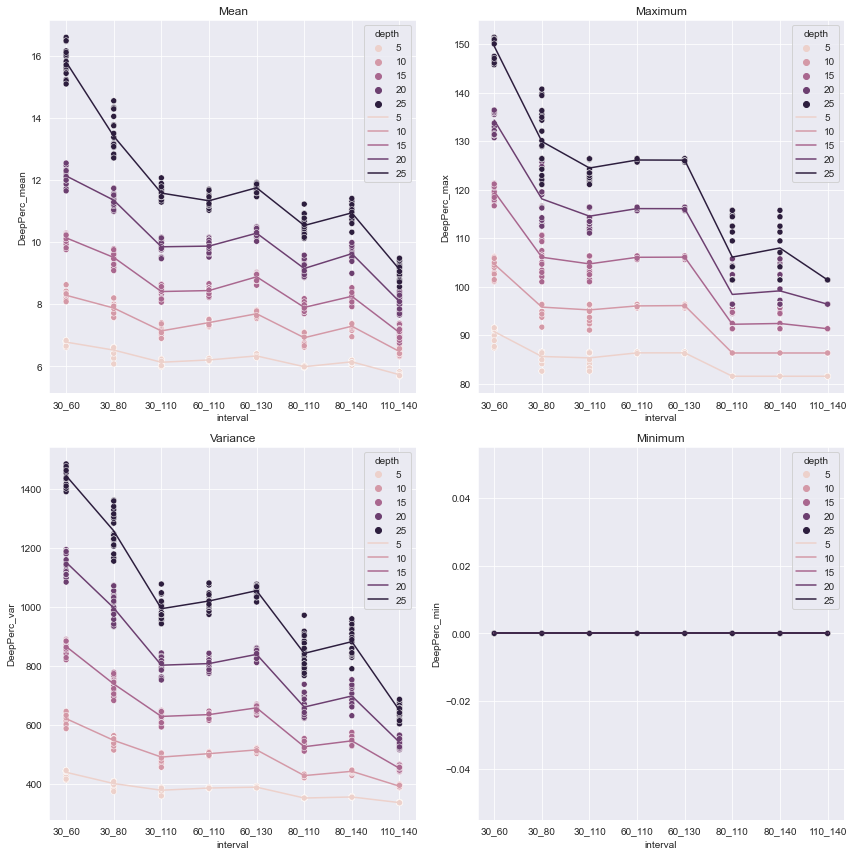

In [14]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['DeepPerc_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='DeepPerc_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['DeepPerc_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='DeepPerc_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['DeepPerc_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='DeepPerc_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['DeepPerc_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='DeepPerc_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/DeepPerc_int")

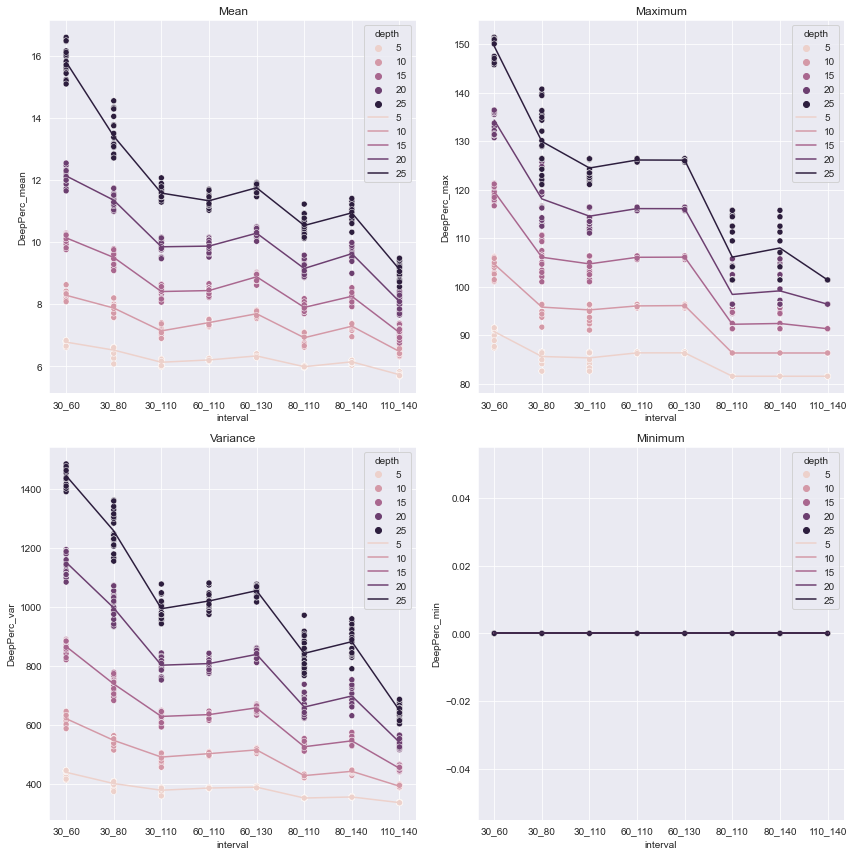

In [15]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['DeepPerc_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='DeepPerc_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['DeepPerc_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='DeepPerc_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['DeepPerc_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='DeepPerc_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['DeepPerc_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='DeepPerc_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='DeepPerc_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/DeepPerc_int")

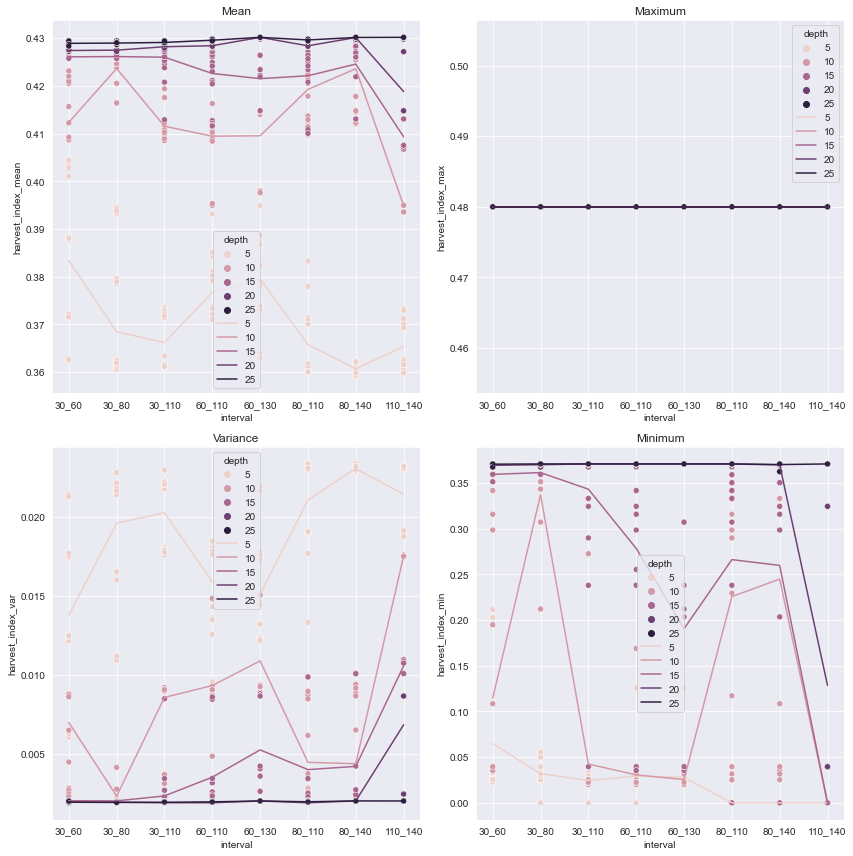

In [16]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['harvest_index_mean','depth','interval']]
sns.scatterplot(data=data,x='interval',y='harvest_index_mean',hue='depth',ax=axs[0,0])
data = group_mean
sns.lineplot(data=data,x='interval',y='harvest_index_mean',hue='depth',ax=axs[0,0])
axs[0,0].set_title('Mean')
data = data_[['harvest_index_max','depth','interval']]
sns.scatterplot(data=data,x='interval',y='harvest_index_max',hue='depth',ax=axs[0,1])
data = group_max
sns.lineplot(data=data,x='interval',y='harvest_index_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['harvest_index_var','depth','interval']]
sns.scatterplot(data=data,x='interval',y='harvest_index_var',hue='depth',ax=axs[1,0])
data = group_var
sns.lineplot(data=data,x='interval',y='harvest_index_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['harvest_index_min','depth','interval']]
sns.scatterplot(data=data,x='interval',y='harvest_index_min',hue='depth',ax=axs[1,1])
data = group_min
sns.lineplot(data=data,x='interval',y='harvest_index_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.tight_layout()
plt.savefig(F"{figdir}/harvest_index_int")